Write a program to implement the K-means clustering algorithm (Use iris dataset)

Dataset Loaded Successfully!
Feature Shape: (150, 4)

Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]

Accuracy: 0.8866666666666667


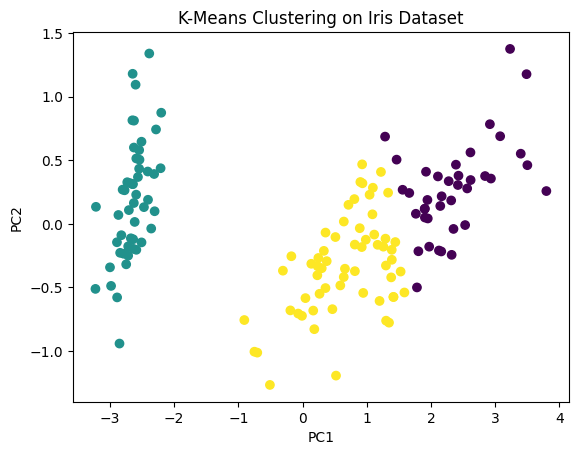

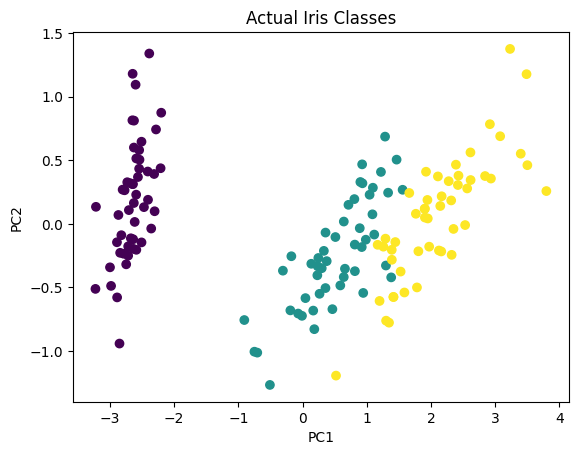

In [1]:
# =============================================
# 1️⃣ IMPORT LIBRARIES
# =============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# =============================================
# 2️⃣ LOAD IRIS DATASET
# =============================================
iris = datasets.load_iris()
X = iris.data          # features
y = iris.target        # true labels (0, 1, 2)

print("Dataset Loaded Successfully!")
print("Feature Shape:", X.shape)

# =============================================
# 3️⃣ APPLY K-MEANS CLUSTERING
# Number of clusters = 3 (Setosa, Versicolor, Virginica)
# =============================================
kmeans = KMeans(n_clusters=3, random_state=42)
pred_clusters = kmeans.fit_predict(X)

print("\nCluster Centers:\n", kmeans.cluster_centers_)

# =============================================
# 4️⃣ MATCH CLUSTERS TO TRUE LABELS
# (K-Means assigns random cluster labels, so map them)
# =============================================
# Create a mapping from cluster -> true class (most common class in each cluster)
from scipy.stats import mode

labels = np.zeros_like(pred_clusters)
for cluster in range(3):
    mask = (pred_clusters == cluster)
    labels[mask] = mode(y[mask], keepdims=True)[0]

# =============================================
# 5️⃣ EVALUATION
# =============================================
print("\nConfusion Matrix:")
print(confusion_matrix(y, labels))

print("\nAccuracy:", accuracy_score(y, labels))

# =============================================
# 6️⃣ VISUALIZE CLUSTERS (PCA 2D)
# =============================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=pred_clusters, cmap='viridis')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# =============================================
# 7️⃣ VISUALIZE TRUE LABELS FOR COMPARISON
# =============================================
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("Actual Iris Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
